In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

/home/vscode/.local/lib/python3.10/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:
def getIMP(root, imageFile):
    test_root = os.path.join(root, 'slice', 's_test') #'/workspaces/data/brain_meningioma/slice/s_test'
    prob_roots = [os.path.join(root, 'oProb', model, 's_test') #f'/workspaces/data/brain_meningioma/oProb/{model}/s_test'
                for model in ['unet1s','unetpp0','unetpp0D'] ]

    maskFile = imageFile.replace('_img.npy', '_mask.npy')
    probFile = imageFile.replace('_img.npy', '_mask.pt')

    imagePath = os.path.join(test_root, 'npy', imageFile)
    maskPath = os.path.join(test_root, 'npy', maskFile)
    probPaths = [os.path.join(prob_root, 'pt', probFile) for prob_root in prob_roots]

    return imagePath, maskPath, probPaths

In [71]:

def plotIMP(imagePath, maskPath, probPaths, figsize=(20, 12),alphas=(0.1,0.5,0)):
    image = np.load(imagePath)
    mask = np.load(maskPath)
    preds = [ (torch.load(probPath,weights_only=False).cpu().numpy() >0.5).squeeze() for probPath in probPaths ]
    plt.figure(figsize=figsize)
    plt.subplot(4, 1, 1)
    plt.imshow(image, cmap="gray")
    for i, pred in enumerate(preds):
        if figsize[0]< figsize[1]:
            plt.subplot(4, 1, i+2)
        else:
            plt.subplot(1, 4, i+2)
        plt.imshow(image, cmap="gray")
        masked_mask = np.ma.masked_where(mask == 0, mask)
        plt.imshow(masked_mask, cmap=plt.cm.colors.ListedColormap(['red']), alpha=alphas[0])
        masked_pred = np.ma.masked_where(pred == 0, pred)
        plt.imshow(masked_pred, cmap=plt.cm.colors.ListedColormap(['green']), alpha=alphas[1])
        plt.imshow(masked_pred*masked_mask, cmap=plt.cm.colors.ListedColormap(['yellow']), alpha=alphas[2])
        
        #orange, cyan

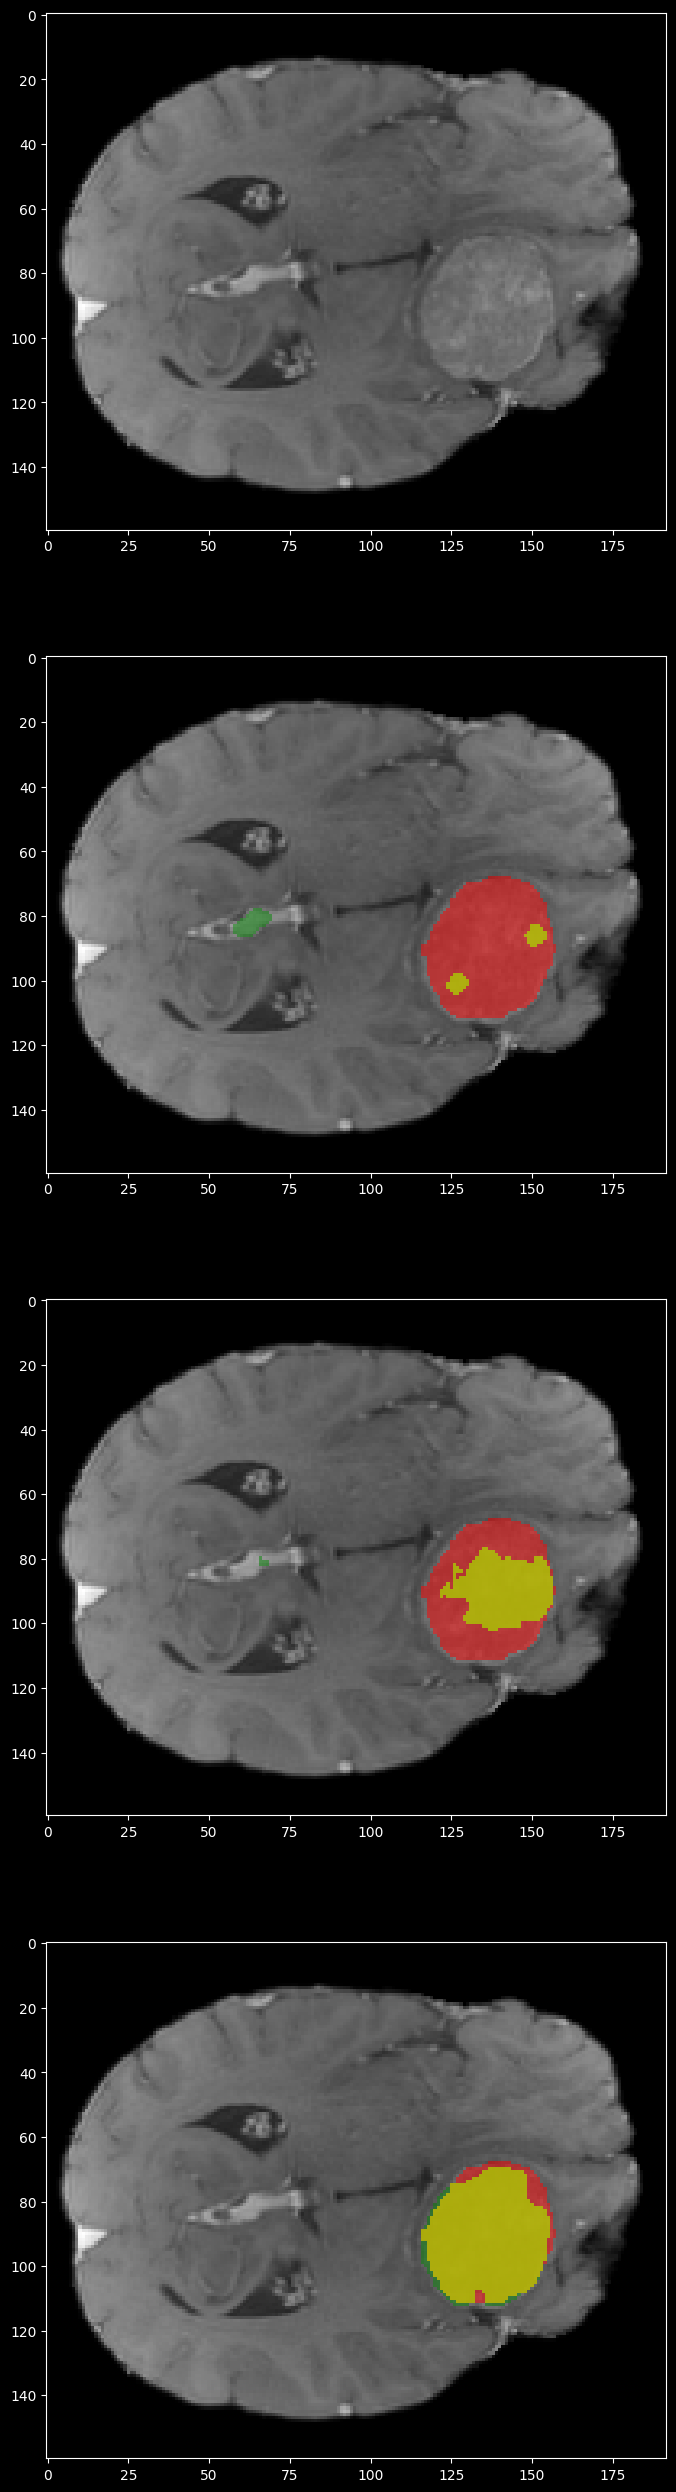

In [72]:
#Occipital Lobe 후두엽 예시
# imageFile = 'BraTS-MEN-RT-0237-1_slice_170_img.npy'
# imageFile = 'BraTS-MEN-RT-0385-1_slice_090_img.npy'
plt.style.use('dark_background')
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0385-1_slice_090_img.npy',),
        figsize=(8,32),alphas=(0.5,0.5,0.5))

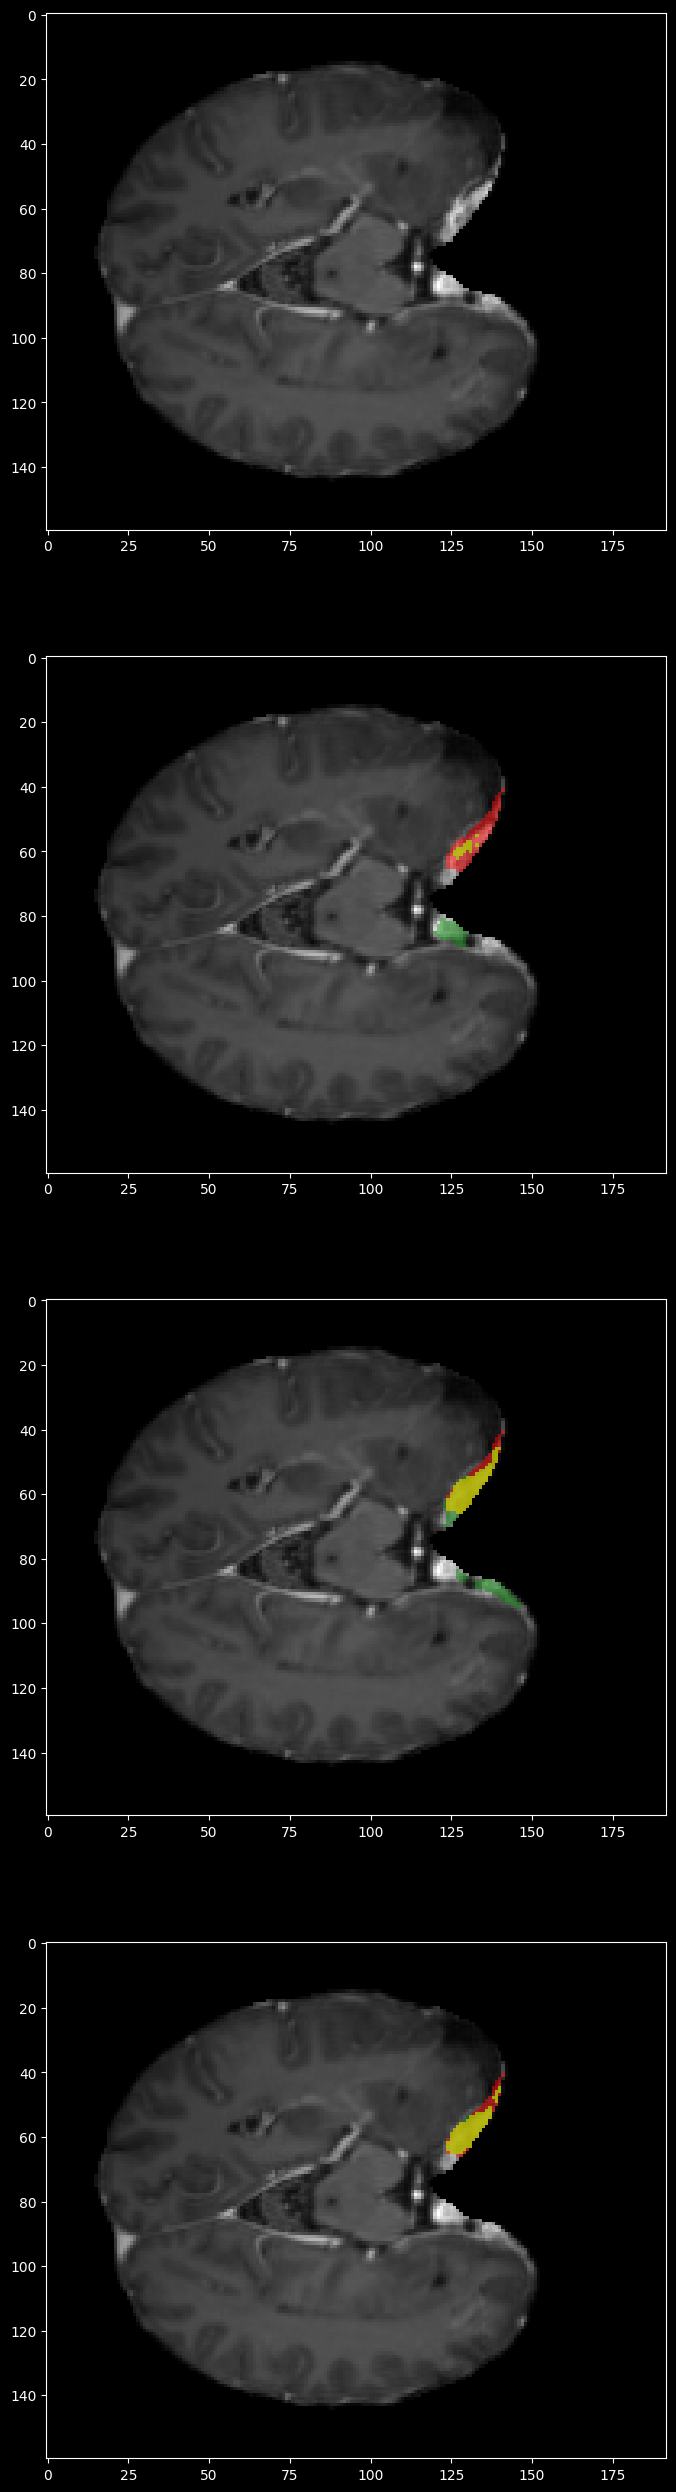

In [74]:
#작은 종양 예시
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 
                'BraTS-MEN-RT-0165-1_slice_067_img.npy'),figsize=(8,32),alphas=(0.5,0.5,0.5))

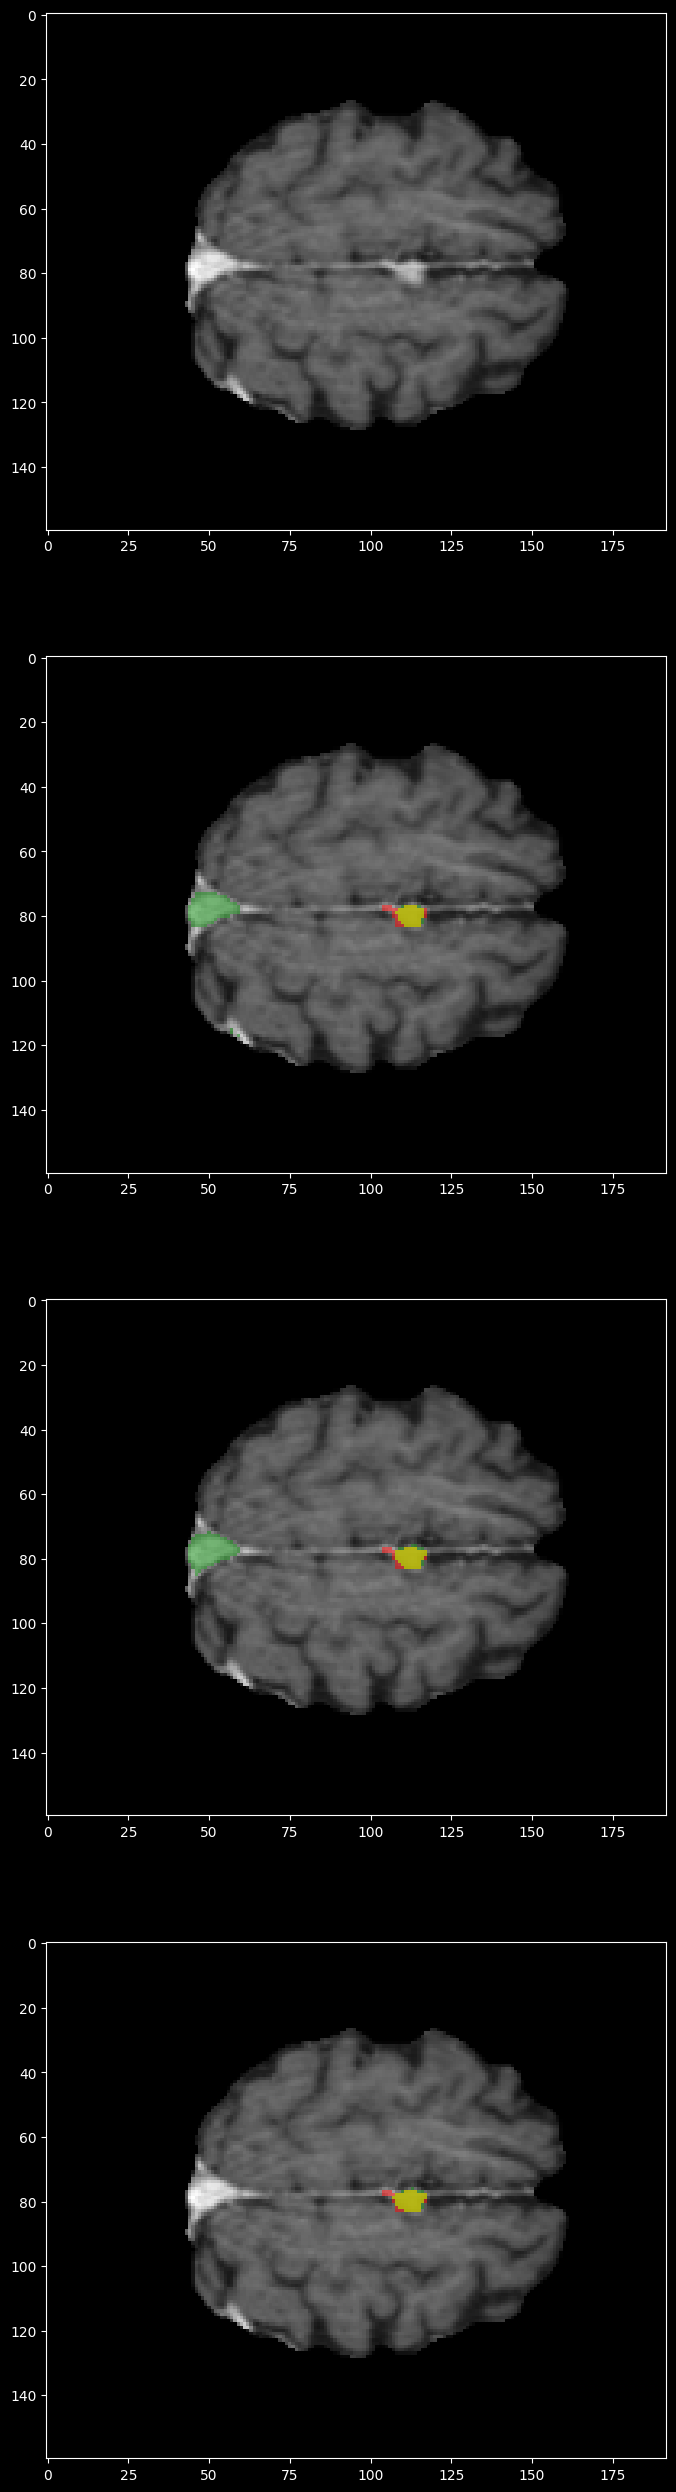

In [75]:
#작은 종양 예시
plotIMP(*getIMP('/workspaces/data/brain_meningioma', 'BraTS-MEN-RT-0320-1_slice_168_img.npy'),
        figsize=(8,32),alphas=(0.5,0.5,0.5))
